In [2]:
import pandas as pd
import numpy as np
import seaborn
import sqlite3
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
init_notebook_mode(connected=True)

# Load NBA stats dataset that was created using nba_api
nba_stats = pd.read_csv(r"C:\Users\gilid\Downloads\nba_stats.csv")

# Database connection
database = r"C:\Users\gilid\Documents\basketball.sqlite" #The path + the file name
conn = sqlite3.connect(database)

# Load Player Attributes like Height, Weight, College, Country, etc..
player_attributes = pd.read_sql("""SELECT *
                        FROM Player_Attributes; """, conn)
player_attributes['ID']=player_attributes['ID'].astype(int)
player_attributes=player_attributes.rename({"ID":"PLAYER_ID"},axis=1)

# Load Box Score Data
games = pd.read_sql("""SELECT *
                        FROM game WHERE SEASON >= 1980; """, conn)

# Load Draft Data
draft_combine = pd.read_sql("""SELECT *
                        FROM Draft_Combine; """, conn)

## 1. Player Height

Text(0.5, 1.0, 'Average Height in Each Draft Year')

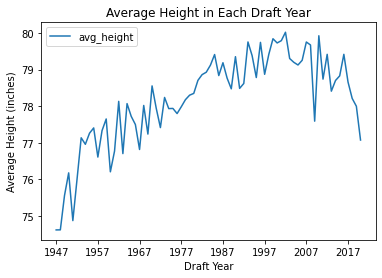

In [65]:
# get the average height for each draft year
height_plot = player_attributes.groupby("DRAFT_YEAR").agg(avg_height=('HEIGHT','mean')).plot()

# label the axes and give a title
height_plot.set_xlabel('Draft Year')
height_plot.set_ylabel('Average Height (inches)')
height_plot.set_title('Average Height in Each Draft Year')

## 2. Player Weight

Text(0.5, 1.0, 'Average Weight in Each Draft Year')

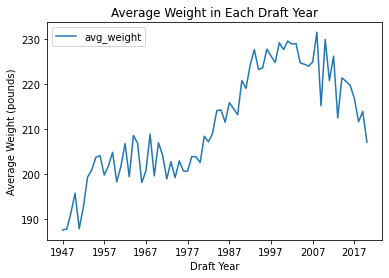

In [68]:
# average weight for each draft year
weight_plot = player_attributes.groupby("DRAFT_YEAR").agg(avg_weight=('WEIGHT','mean')).plot()

# label the axes and give a title
weight_plot.set_xlabel('Draft Year')
weight_plot.set_ylabel('Average Weight (pounds)')
weight_plot.set_title('Average Weight in Each Draft Year')

In [ ]:
# makes sense because if height has an overall increase throughout the years then
# weight should increase

## 3. Speed

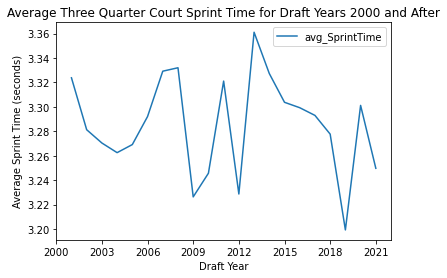

In [71]:
# get the sprint time for the different draft year combines
speed_plot = draft_combine.groupby("yearCombine").agg(avg_SprintTime =('timeThreeQuarterCourtSprint','mean')).plot()

# label the axes and give a title
speed_plot.set_xlabel('Draft Year')
speed_plot.set_ylabel('Average Sprint Time (seconds)')
speed_plot.set_title('Average Three Quarter Court Sprint Time for Draft Years 2000 and After')

# change the tick frequency on the x-axis
speed_plot.xaxis.set_ticks(np.arange(2000, 2022, 3))

#### Let's look at the correlation between speed and height

In [11]:
draft_combine['Height (inches)'] = draft_combine['heightWOShoesInches']
draft_combine['Sprint Time (seconds)'] = draft_combine['timeThreeQuarterCourtSprint']

# create a scatter plot of height vs. sprint time
px.scatter(draft_combine.sort_values('heightWOShoesInches'),x='Height (inches)', y='Sprint Time (seconds)', title ='Time it Takes To Run Three Quarter Court Sprint vs. Height', trendline = "ols")

In [ ]:
# Taller players seem to take longer than shorter players to do the spring meaning so they are slower than shorter players
# Since the NBA is becoming taller, this explains why players are overall seemingly becoming slower

## 4. Agility

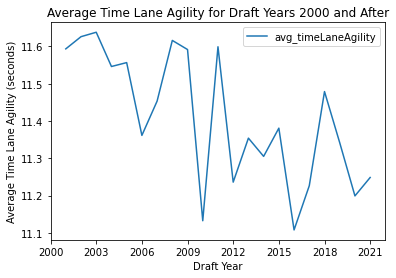

In [72]:
# get the agility for different draft year combines
agility_plot = draft_combine.groupby("yearCombine").agg(avg_timeLaneAgility =('timeLaneAgility','mean')).plot()

# label the axes and give a title
agility_plot.set_xlabel('Draft Year')
agility_plot.set_ylabel('Average Time Lane Agility (seconds)')
agility_plot.set_title('Average Time Lane Agility for Draft Years 2000 and After')

# change the tick frequency on the x-axis
agility_plot.xaxis.set_ticks(np.arange(2000, 2022, 3))

#### let's look at the correlation between height and agility

In [12]:
draft_combine['Height (inches)'] = draft_combine['heightWOShoesInches']
draft_combine['Time Lane Agility (seconds)'] = draft_combine['timeLaneAgility']

px.scatter(draft_combine.sort_values('heightWOShoesInches'),x='Height (inches)',y='Time Lane Agility (seconds)', title = 'Time Lane Agility vs. Height', trendline = "ols")

In [ ]:
# Taller players seem to take longer than shorter players to do agility tasks meaning they are less agile than shorter players
# Since the NBA is becoming taller, this explains why players are overall seemingly becoming less agile

## 5. Strength

In [ ]:
# Since people are starting to weigh more as the years go on, their strength is probably increasing

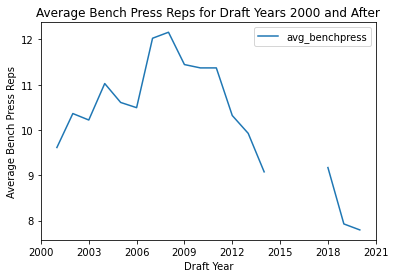

In [115]:
# get the strength for different draft year combines
strength_plot = draft_combine.groupby("yearCombine").agg(avg_benchpress =('repsBenchPress135','mean')).plot()

# label the axes and give a title
strength_plot.set_xlabel('Draft Year')
strength_plot.set_ylabel('Average Bench Press Reps')
strength_plot.set_title('Average Bench Press Reps for Draft Years 2000 and After')

# change the tick frequency on the x-axis
strength_plot.xaxis.set_ticks(np.arange(2000, 2022, 3))

### Are taller players stronger?

In [13]:
draft_combine['Height (inches)'] = draft_combine['heightWOShoesInches']
draft_combine['Bench Press Reps'] = draft_combine['repsBenchPress135']

px.scatter(draft_combine.sort_values('heightWOShoesInches'),x='Height (inches)',y='Bench Press Reps', title = 'Number of Bench Press Reps vs. Height', trendline = "ols")

In [ ]:
# Players seem to be "weaker" now when they enter the NBA. They can't bench press as much
# There doesn't seem to be a correlation between bench press and height 

## 6. Vertical Leap

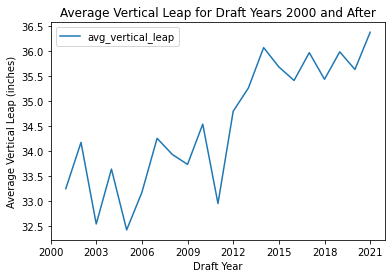

In [78]:
# get the strength for different draft year combines
vertical_leap_plot = draft_combine.groupby("yearCombine").agg(avg_vertical_leap =('verticalLeapMaxInches','mean')).plot()

# label the axes and give a title
vertical_leap_plot.set_xlabel('Draft Year')
vertical_leap_plot.set_ylabel('Average Vertical Leap (inches)')
vertical_leap_plot.set_title('Average Vertical Leap for Draft Years 2000 and After')

# change the tick frequency on the x-axis
vertical_leap_plot.xaxis.set_ticks(np.arange(2000, 2022, 3))

#### correlation between vertical leap and height

In [14]:
draft_combine['Height (inches)'] = draft_combine['heightWOShoesInches']
draft_combine['Vertical Leap (inches)'] = draft_combine['verticalLeapMaxInches']

px.scatter(draft_combine.sort_values('heightWOShoesInches'),x='Height (inches)',y='Vertical Leap (inches)', title = "Vertical Leap vs. Height", trendline = "ols")

## 7. Percentage of Players Playing All Games

Text(0.5, 1.0, 'Percentage of Players Playing All 82 Games Since 1980 Season')

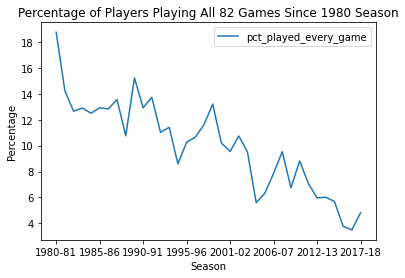

In [93]:
# get the maximum number of games played per season between 1980 and 2018
# let's exclude 1999 and 2011 seasons because these seasons had less than 82 games due to lockouts
num_games_played_per_year=nba_stats[(nba_stats.SEASON_ID>='1980') & (nba_stats.SEASON_ID!='1998-99') &\
                                    (nba_stats.SEASON_ID!='2011-12') & (nba_stats.SEASON_ID<='2018')].groupby(["SEASON_ID"],as_index=False).agg(num_games_max=("GP","max"))

# Some players get traded so they might play more than the 82 games of a season
# If a player plays more than 82 games, we will consider them having played 82 games
num_games_played_per_year['num_games_max']=num_games_played_per_year.apply(lambda l:82 if l['num_games_max']>82 else l['num_games_max'],axis=1)

nba_stats=nba_stats.merge(num_games_played_per_year,on='SEASON_ID',how='inner')

nba_stats=nba_stats.sort_values("GP",ascending=False).groupby(['SEASON_ID','PLAYER_ID']).head(1).reset_index(drop=True)

# get the percentage of games players played during 82 game seasons
nba_stats['pct_of_total_games']=nba_stats['GP']/82

# if a player played all 82 the column has value 1, if not it has value 0
nba_stats['played_every_game']=nba_stats.apply(lambda l:1 if l['pct_of_total_games']>= 1 else 0,axis=1)

# get the percentage of players that played all 82 of the games
nba_percentage_games_played = nba_stats.groupby("SEASON_ID").agg(pct_played_every_game=('played_every_game','mean'))
nba_percentage_games_played['pct_played_every_game'] = nba_percentage_games_played['pct_played_every_game']*100

# plot percentage of players playing all 82 games since 1980 season
percentage_plot = nba_percentage_games_played.plot()

# label the axes and give a title
percentage_plot.set_xlabel('Season')
percentage_plot.set_ylabel('Percentage')
percentage_plot.set_title('Percentage of Players Playing All 82 Games Since 1980 Season')



## 8. Three Point Shooting

Text(0.5, 1.0, 'Average Number of Threes Attempted Per Game Since 1980 Season')

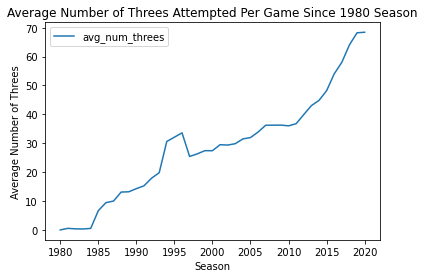

In [85]:
games['FG3A']=games.fillna({'FG3A_HOME':0})['FG3A_HOME'].astype(float)\
+games.fillna({'FG3A_AWAY':0})['FG3A_AWAY'].astype(float)

num_threes_plot = games.groupby("SEASON").agg(avg_num_threes=('FG3A','mean')).plot()
num_threes_plot.set_xlabel('Season')
num_threes_plot.set_ylabel('Average Number of Threes')
num_threes_plot.set_title('Average Number of Threes Attempted Per Game Since 1980 Season')

## 9. Scoring

Text(0.5, 1.0, 'Average Number of Points Scored Per Game Since 1980 Season')

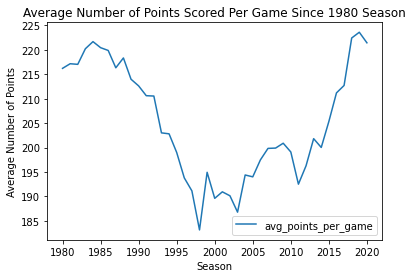

In [91]:
# add points by home and away team to get total number of points scored in a game
games['points']=games.PTS_HOME+games.PTS_AWAY

# get the average number of points scored per game for the different seasons
ppg_plot = games.groupby("SEASON").agg(avg_points_per_game =('points','mean')).plot()

# label all the axes and make a title
ppg_plot.set_xlabel('Season')
ppg_plot.set_ylabel('Average Number of Points')
ppg_plot.set_title('Average Number of Points Scored Per Game Since 1980 Season')

#### why does the 80s have such a high number of points score per game if they didn't shoot as many threes?

Text(0.5, 1.0, 'Average Number of Field Goal Attempts Per Game Since 1983 Season')

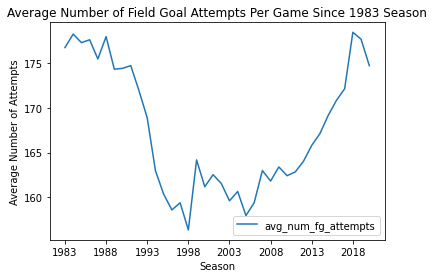

In [9]:
# add the number of home and away team field goals to get total field goal attempts of a game
games['FGA']=games.fillna({'FGA_HOME':0})['FGA_HOME'].astype(float)\
+games.fillna({'FGA_AWAY':0})['FGA_AWAY'].astype(float)

# get the average number of field goal attempts for the different seasons
# let's filter to games after 1982 because field goal attempt data from 1982 and prior is missing
games_2 = games[games['SEASON'] > '1982']
fga_plot = games_2.groupby("SEASON").agg(avg_num_fg_attempts=('FGA','mean')).plot()

# label all the axes and make a title
fga_plot.set_xlabel('Season')
fga_plot.set_ylabel('Average Number of Attempts')
fga_plot.set_title('Average Number of Field Goal Attempts Per Game Since 1983 Season')

Text(0.5, 1.0, 'Average Number of Free Throw Attempts Per Game Since 1980 Season')

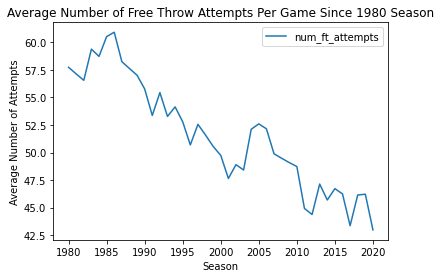

In [106]:
# add the number of home and away team free throw attemps to get total field goal attempts of a game
games['FTA']=games.fillna({'FTA_HOME':0})['FTA_HOME'].astype(float)\
+games.fillna({'FTA_AWAY':0})['FTA_AWAY'].astype(float)

# get the average number of field goal attempts for the different seasons
fta_plot = games.groupby("SEASON").agg(num_ft_attempts=('FTA','mean')).plot()

# label all the axes and make a title
fta_plot.set_xlabel('Season')
fta_plot.set_ylabel('Average Number of Attempts')
fta_plot.set_title('Average Number of Free Throw Attempts Per Game Since 1980 Season')

# Appendix

## Distribution of Heights

In [22]:
# get a histogram of player heights
df = px.data.tips()
player_attributes['height (inches)'] = player_attributes['HEIGHT']
fig = px.histogram(player_attributes, x="height (inches)", title = "Frequency of Heights")
fig.show()

## Distribution of Weights

In [25]:
# get a histogram of player weights
df = px.data.tips()
player_attributes['weight (pounds)'] = player_attributes['WEIGHT']
fig = px.histogram(player_attributes, x="weight (pounds)", title = "Frequency of Weights")
fig.show()

## Universities a lot of NBA players went to

In [44]:
# get the number of players per school
players_by_college=player_attributes.groupby("SCHOOL",as_index=False).agg(num_players=('PLAYER_ID','count')).sort_values("num_players",False)
# get the number of NBA players for universities that have made more than 50 nba players
more_than_50_players = players_by_college[players_by_college['num_players']>=50]
fig = px.bar(more_than_50_players, x='SCHOOL', y='num_players', title = 'Universities that Have Had At Least 50 NBA Players')

fig.show()


C:\Users\gilid\AppData\Local\Temp\ipykernel_16300\1376493687.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.



## Moving Averages of Height Plot

In [60]:
# moving average of heights over ten years span. So height in 
moving_average_height_plot=player_attributes.groupby("FROM_YEAR",as_index=False).agg(avg_height=('HEIGHT','mean'))
moving_average_height_plot['Draft Year']= moving_average_height_plot['FROM_YEAR']
moving_average_height_plot['Moving Average Height (inches)']= moving_average_height_plot['avg_height']
px.scatter(moving_average_height_plot,x='Draft Year',y='Moving Average Height (inches)',trendline="rolling", trendline_options=dict(window=10), title = '10 Year Moving Height Average Span For Different Years')
